In [37]:
import os
from dotenv import load_dotenv
from glob import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

import SimpleITK as sitk

In [24]:
# Load environment variables from .env file
load_dotenv()

images_dir = os.getenv("IMAGE_DIR")
volumes_dir = os.getenv("VOLUME_DIR")

## Images

In [25]:
images_dir

'E:\\luna25_images'

In [26]:
image_filenames = glob(os.path.join(images_dir, "*.mha"))
len(image_filenames)

4069

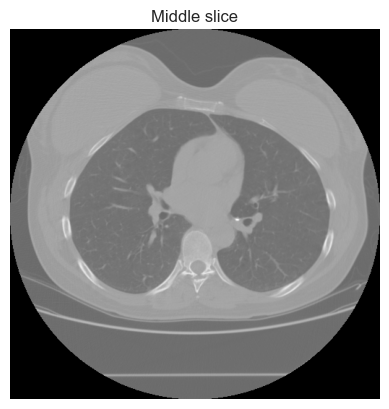

In [27]:
image = sitk.ReadImage(image_filenames[5])
image_array = sitk.GetArrayFromImage(image)


plt.imshow(image_array[image_array.shape[0] // 2], cmap='gray')
plt.title("Middle slice")
plt.axis('off')
plt.show()

## Nodule Volumes

In [28]:
## CSV with the nodules information
nodule_info = pd.read_csv(
	os.path.join(volumes_dir, "LUNA25_Public_Training_Development_Data.csv")
	)
nodule_info.head()

,PatientID,SeriesInstanceUID,StudyDate,CoordX,CoordY,CoordZ,LesionID,AnnotationID,NoduleID,label,Age_at_StudyDate,Gender
0,100570,1.2.840.113654.2.55.32380467633296345717423514...,19990102,61.14,-163.28,-177.75,1,100570_1_19990102,100570_1,1,63,Male
1,106364,1.2.840.113654.2.55.16930993607533226779708566...,19990102,30.64,-95.96,-128.59,1,106364_1_19990102,106364_1,1,67,Female
2,127302,1.2.840.113654.2.55.13728437630416839550344528...,20000102,-82.53,-27.85,-209.46,1,127302_1_20000102,127302_1,1,61,Male
3,128899,1.2.840.113654.2.55.40415300708683206534849072...,20010102,-38.69,-8.78,-39.43,1,128899_1_20010102,128899_1,1,64,Male
4,215816,1.3.6.1.4.1.14519.5.2.1.7009.9004.241362276021...,19990102,32.89,-37.98,-100.04,1,215816_1_19990102,215816_1,1,69,Female


In [29]:
nodule_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          6163 non-null   int64  
 1   SeriesInstanceUID  6163 non-null   object 
 2   StudyDate          6163 non-null   int64  
 3   CoordX             6163 non-null   float64
 4   CoordY             6163 non-null   float64
 5   CoordZ             6163 non-null   float64
 6   LesionID           6163 non-null   int64  
 7   AnnotationID       6163 non-null   object 
 8   NoduleID           6163 non-null   object 
 9   label              6163 non-null   int64  
 10  Age_at_StudyDate   6163 non-null   int64  
 11  Gender             6163 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 577.9+ KB


In [30]:
print("Number of patients:", nodule_info["PatientID"].nunique())
print("Number of nodules:", nodule_info["NoduleID"].nunique())

Number of patients: 2120
Number of nodules: 3762


In [31]:
nodule_info.NoduleID.value_counts()

NoduleID
122103_2    3
110716_1    3
218499_1    3
104839_1    3
114689_1    3
           ..
115759_1    1
133549_2    1
215816_1    1
215816_2    1
126520_1    1
Name: count, Length: 3762, dtype: int64

In [32]:
nodule_info[nodule_info["NoduleID"] == "122103_2"]

,PatientID,SeriesInstanceUID,StudyDate,CoordX,CoordY,CoordZ,LesionID,AnnotationID,NoduleID,label,Age_at_StudyDate,Gender
2599,122103,1.2.840.113654.2.55.27419391953300038615840022...,19990102,-56.68,45.20,1640.18,2,122103_2_19990102,122103_2,0,59,Male
2600,122103,1.2.840.113654.2.55.12233914752951890295182532...,20000102,-42.41,77.90,1846.90,2,122103_2_20000102,122103_2,0,60,Male
2601,122103,1.2.840.113654.2.55.22319624529836974789277445...,20010102,-70.33,28.29,1612.42,2,122103_2_20010102,122103_2,0,61,Male


In [33]:
nodule_info.PatientID.value_counts()

PatientID
217292    17
201632    17
100438    16
121380    16
208553    15
          ..
117556     1
122646     1
130695     1
120493     1
132672     1
Name: count, Length: 2120, dtype: int64

In [34]:
nodule_info[nodule_info["PatientID"] == 217292]

,PatientID,SeriesInstanceUID,StudyDate,CoordX,CoordY,CoordZ,LesionID,AnnotationID,NoduleID,label,Age_at_StudyDate,Gender
5755,217292,1.3.6.1.4.1.14519.5.2.1.7009.9004.177033576424...,19990102,-52.26,108.61,-1298.43,1,217292_1_19990102,217292_1,0,61,Male
5756,217292,1.3.6.1.4.1.14519.5.2.1.7009.9004.177033576424...,19990102,-45.43,116.28,-1304.72,2,217292_2_19990102,217292_2,0,61,Male
5757,217292,1.3.6.1.4.1.14519.5.2.1.7009.9004.177033576424...,19990102,-61.47,-54.94,-1455.17,4,217292_4_19990102,217292_4,0,61,Male
5758,217292,1.3.6.1.4.1.14519.5.2.1.7009.9004.177033576424...,19990102,-71.01,-44.42,-1445.26,3,217292_3_19990102,217292_3,0,61,Male
5759,217292,1.3.6.1.4.1.14519.5.2.1.7009.9004.177033576424...,19990102,-140.58,64.29,-1506.53,5,217292_5_19990102,217292_5,0,61,Male
5760,217292,1.3.6.1.4.1.14519.5.2.1.7009.9004.177033576424...,19990102,147.41,36.62,-1496.30,6,217292_6_19990102,217292_6,0,61,Male
5761,217292,1.3.6.1.4.1.14519.5.2.1.7009.9004.333024092084...,20000102,-49.14,-129.56,995.08,1,217292_1_20000102,217292_1,0,62,Male
5762,217292,1.3.6.1.4.1.14519.5.2.1.7009.9004.333024092084...,20000102,-42.81,-122.38,988.31,2,217292_2_20000102,217292_2,0,62,Male
5763,217292,1.3.6.1.4.1.14519.5.2.1.7009.9004.333024092084...,20000102,-63.00,-294.08,840.64,4,217292_4_20000102,217292_4,0,62,Male
5764,217292,1.3.6.1.4.1.14519.5.2.1.7009.9004.333024092084...,20000102,-72.38,-283.70,850.82,3,217292_3_20000102,217292_3,0,62,Male


In [35]:
nodule_info.label.value_counts()

label
0    5608
1     555
Name: count, dtype: int64

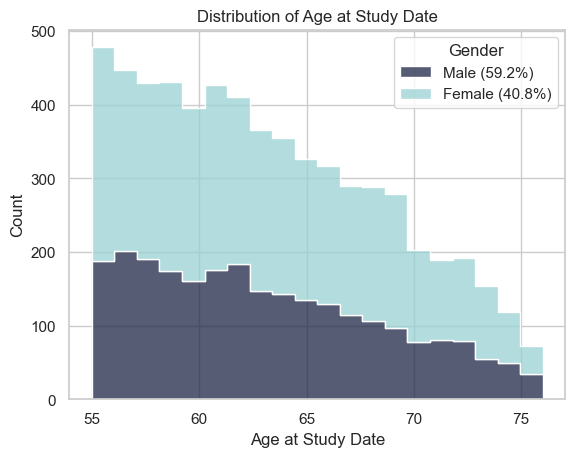

In [36]:
male_percentage = float(nodule_info.Gender.value_counts().iloc[0] / len(nodule_info.Gender))*100
female_percentage = 100 - male_percentage

labels = {
    'M': f'Male ({male_percentage:.1f}%)',
    'F': f'Female ({female_percentage:.1f}%)'
}

sns.histplot(
	nodule_info, x="Age_at_StudyDate", hue="Gender",
	bins=20, element="step",  multiple="stack",  palette="ch:rot=-.25,hue=1,light=.75"
).set(
	xlabel="Age at Study Date",
	ylabel="Count",
	title="Distribution of Age at Study Date"
);

plt.legend(title="Gender", labels=labels.values());

In [ ]:
# Read the npy
